# Car Price Prediction Model

### Analyzing features

+ **Name** - The brand and model of the car.
+ **Year** -  The year of the car's model.
+ **Selling Price** -  The selling price of the car (to be predicted).
+ **KM driven** - The distance travelled of the car in kilometers.
+ **Fuel** - The fuel type of the car.
+ **Seller Type** -  The type of seller of the car listing.
+ **Transmission** - The type of transition of the car.
+ **Owner** - The number of previous owners of the car.
+ **Mileage** - The fuel efficiency of the car.
+ **Engine** - The engine power of the car.
+ **Max Power** - The horsepower of the car sent to the wheels.
+ **Torque** - The force generated by the car's engine.
+ **Seats** - The number of seats in the car.



### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import math
import matplotlib.pyplot as plt 
import warnings
from sklearn.preprocessing import PolynomialFeatures
warnings.filterwarnings('ignore')

### Checking library versions

In [2]:
import matplotlib
np.__version__, pd.__version__, sns.__version__, matplotlib.__version__

('1.24.4', '1.5.3', '0.12.2', '3.7.2')

### 1. Load data


In [3]:
# Load the csv file into a variable
df = pd.read_csv('./data/Cars - Cars.csv')

In [4]:
# Check the headers of the data
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [5]:
# Check the shape of the data
df.shape

(8128, 13)

In [6]:
# Check the data types of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [7]:
# Checking the columns
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

### 2. Exploratory Data Analysis

The names of the columns are determined to not need renaming.

As per the instructions, the lines of data containing CNG and LPG as fuel, test drive cars as owner will be deleted. The column of torque will also be deleted.

In [8]:
df = df[df.fuel != "CNG"]
df = df[df.fuel != "LPG"]
df = df[df.owner != "Test Drive Car"]
df.pop("torque")

# Check the shape of the modified data
df.shape

(8028, 12)

### Label encoding

The replace method is used since LabelEncoder from sklearn does not allow for custom order. The map dictionary contains the order mapping of the owner column. Since rows containing "Test Drive Car" are already deleted, it is not included in the mapping.

In [9]:
map={"First Owner":1,"Second Owner":2,"Third Owner":3,"Fourth & Above Owner":4}
df.replace({"owner":map},inplace=True)

df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,1,23.4 kmpl,1248 CC,74 bhp,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,2,21.14 kmpl,1498 CC,103.52 bhp,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,3,17.7 kmpl,1497 CC,78 bhp,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,1,23.0 kmpl,1396 CC,90 bhp,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,1,16.1 kmpl,1298 CC,88.2 bhp,5.0


The columns "Mileage","Engine","Max Power" and "Name" are modified as required by the instructions.

In [10]:
df.mileage = df.mileage.str.split().str[0]
df.mileage = df.mileage.astype(float)

df.engine = df.engine.str.split().str[0]
df.engine = df.engine.astype(float)

df.max_power = df.max_power.str.split().str[0]
df.max_power = df.max_power.astype(float)

df.name = df.name.str.split().str[0]

In [11]:
# Checking if modifications and data type changes are applied
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8028 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8028 non-null   object 
 1   year           8028 non-null   int64  
 2   selling_price  8028 non-null   int64  
 3   km_driven      8028 non-null   int64  
 4   fuel           8028 non-null   object 
 5   seller_type    8028 non-null   object 
 6   transmission   8028 non-null   object 
 7   owner          8028 non-null   int64  
 8   mileage        7814 non-null   float64
 9   engine         7814 non-null   float64
 10  max_power      7820 non-null   float64
 11  seats          7814 non-null   float64
dtypes: float64(4), int64(4), object(4)
memory usage: 815.3+ KB


In [12]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,5.0


### Univariate analysis
**Count Plot**

The "fuel", "transmission" and "seats" columns will be analyzed using count plot since the values of these columns contain only a few variations and count plot will clearly show the distribution of the values.

<Axes: xlabel='fuel', ylabel='count'>

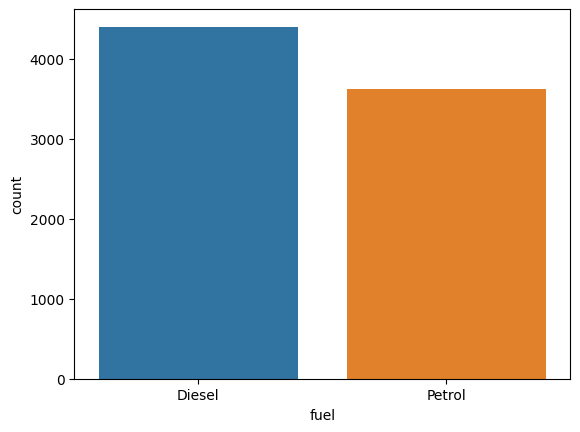

In [13]:
sns.countplot(data = df, x = 'fuel')

<Axes: xlabel='transmission', ylabel='count'>

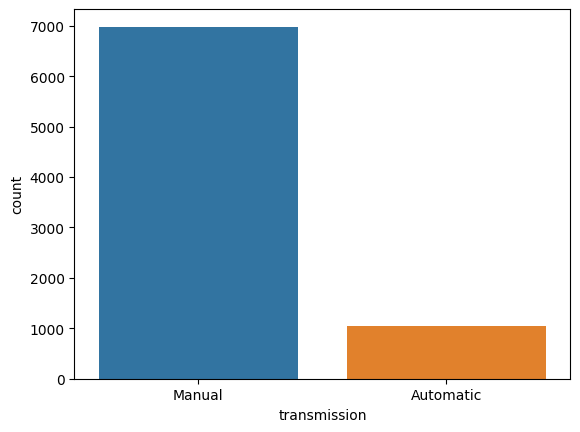

In [14]:
sns.countplot(data = df, x = 'transmission')

<Axes: xlabel='seats', ylabel='count'>

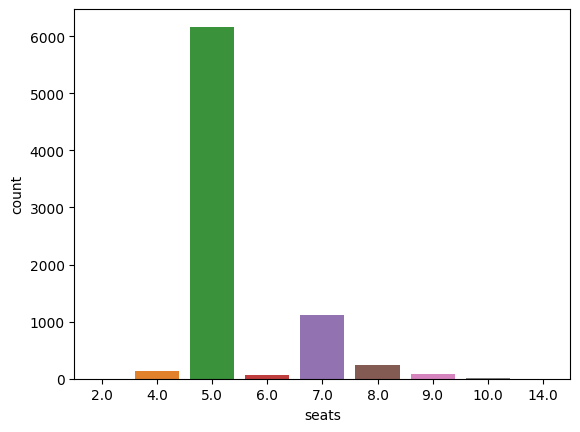

In [15]:
sns.countplot(data = df, x = 'seats')

We can observe that although the types of fuel of the cars are somewhat evenly distributed, the major of the cars have a manual transmission and are five seaters.

**Distribution Plot**

The "year" column will be analyzed by using distribution plot to see its distribution

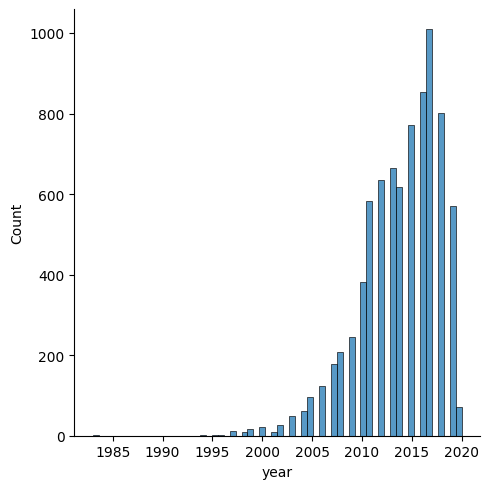

In [16]:
sns.displot(data = df, x = 'year')

### Multivariate Analysis
**Box Plot**

The "fuel" column will be analyzed using box plot in relation to the selling price of the car to see if any outliers exist and how the distribution impacts the price.

Text(0.5, 0, 'No. of previous owners')

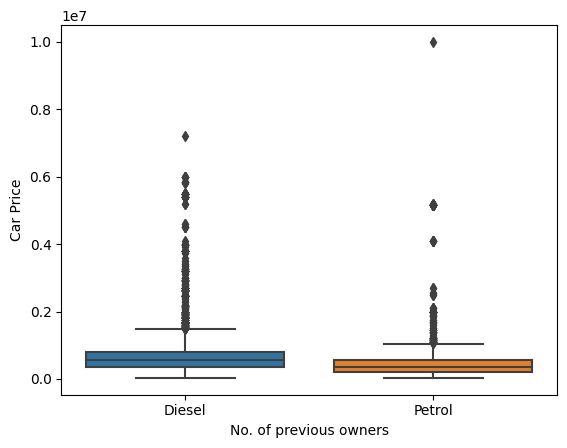

In [17]:
sns.boxplot(x = df.fuel, y = df.selling_price)
plt.ylabel("Car Price")
plt.xlabel("No. of previous owners")

**Scatter Plot**

The "year" column and the "transmission" colum are used in a scatter plot to see the relation between their values and the selling price of the cars.

<Axes: xlabel='year', ylabel='selling_price'>

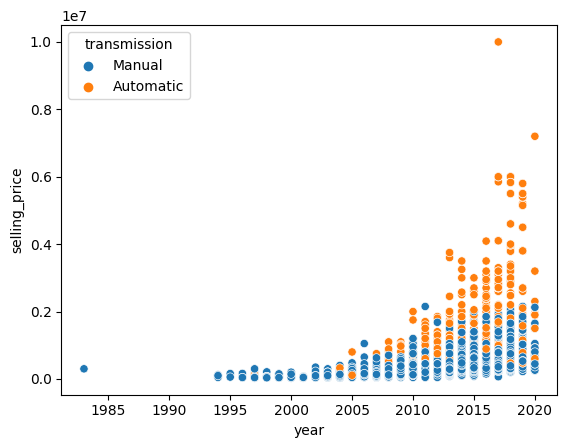

In [18]:
sns.scatterplot(x = df.year, y = df.selling_price, hue = df.transmission)

In addition to the modifications from the instructions, the "name" column will also be label encoded. The reason being that the brand of the cars might have a significant impact on the sell price of the cars and as such, the data of this column needs to explored during EDA phase, and the correlation matrix requires this column to be label encoded.

In [19]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df.name = le.fit_transform(df.name)

df.name.unique()

array([20, 27, 10, 11, 29,  9, 26, 19, 28,  4,  7,  6, 14, 21, 22,  2, 30,
        3, 23, 17, 13, 16, 18, 31,  5, 15,  8,  0,  1, 12, 24, 25])

In [20]:
# Check to see what each number maps to
le.classes_

array(['Ambassador', 'Ashok', 'Audi', 'BMW', 'Chevrolet', 'Daewoo',
       'Datsun', 'Fiat', 'Force', 'Ford', 'Honda', 'Hyundai', 'Isuzu',
       'Jaguar', 'Jeep', 'Kia', 'Land', 'Lexus', 'MG', 'Mahindra',
       'Maruti', 'Mercedes-Benz', 'Mitsubishi', 'Nissan', 'Opel',
       'Peugeot', 'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen',
       'Volvo'], dtype=object)

In [21]:
# Saving the names and what they map to in a dictionary to put into model file
name_map = {}
keys = le.classes_
values = df.name.unique()
for key in keys:
    for value in values:
        name_map[key] = value
        values = np.delete(values, np.where(values == value))
        break

name_map

{'Ambassador': 20,
 'Ashok': 27,
 'Audi': 10,
 'BMW': 11,
 'Chevrolet': 29,
 'Daewoo': 9,
 'Datsun': 26,
 'Fiat': 19,
 'Force': 28,
 'Ford': 4,
 'Honda': 7,
 'Hyundai': 6,
 'Isuzu': 14,
 'Jaguar': 21,
 'Jeep': 22,
 'Kia': 2,
 'Land': 30,
 'Lexus': 3,
 'MG': 23,
 'Mahindra': 17,
 'Maruti': 13,
 'Mercedes-Benz': 16,
 'Mitsubishi': 18,
 'Nissan': 31,
 'Opel': 5,
 'Peugeot': 15,
 'Renault': 8,
 'Skoda': 0,
 'Tata': 1,
 'Toyota': 12,
 'Volkswagen': 24,
 'Volvo': 25}

The "fuel","seller type" and "transmission" columns will also be label encoded for the above reasons, although the impact of these features is unknown.

In [22]:
df.fuel = le.fit_transform(df.fuel)

df.fuel.unique()

array([0, 1])

In [23]:
le.classes_

array(['Diesel', 'Petrol'], dtype=object)

In [24]:
df.seller_type = le.fit_transform(df.seller_type)

df.seller_type.unique()

array([1, 0, 2])

In [25]:
le.classes_

array(['Dealer', 'Individual', 'Trustmark Dealer'], dtype=object)

In [26]:
df.transmission = le.fit_transform(df.transmission)

df.transmission.unique()

array([1, 0])

In [27]:
le.classes_

array(['Automatic', 'Manual'], dtype=object)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8028 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8028 non-null   int32  
 1   year           8028 non-null   int64  
 2   selling_price  8028 non-null   int64  
 3   km_driven      8028 non-null   int64  
 4   fuel           8028 non-null   int32  
 5   seller_type    8028 non-null   int32  
 6   transmission   8028 non-null   int32  
 7   owner          8028 non-null   int64  
 8   mileage        7814 non-null   float64
 9   engine         7814 non-null   float64
 10  max_power      7820 non-null   float64
 11  seats          7814 non-null   float64
dtypes: float64(4), int32(4), int64(4)
memory usage: 947.9 KB


**Correlation Matrix**

The correlation matrix shows us how each of the features related to one another and most importantly, how they relate to our label; the selling price of the cars.

<Axes: >

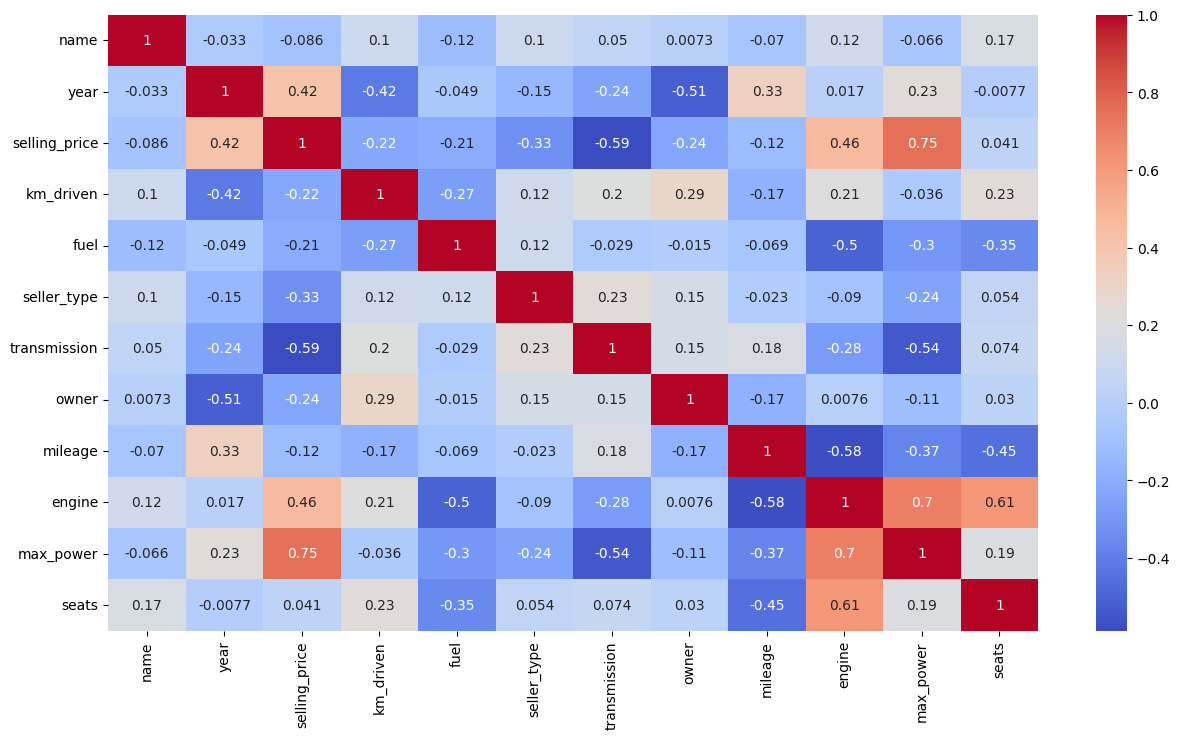

In [29]:
plt.figure(figsize = (15,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")

From the heatmap, we can see that the selling price of the cars are highly correlated to the year, transmission, engine power and max power of the cars. This confers with my assumption that the year and engine power of the car will have an impact on the price of the car.

The engine power and max power of the cars are highly correlated, as they should be, considering both shows the performance of the cars. Therefore, both of these features cannot be used but one of them should be a feature in our model.

I believe the mileage of the car and the brand should also have a significant impact on the selling price of the car, considering most people would care about their fuel economy and also what brand of car they are buying.

**Predictive Power Score**

The predictive power score library is used to more accurately see the correlation results and confirm our assumptions of the relation of the features to the label.

<Axes: xlabel='x', ylabel='y'>

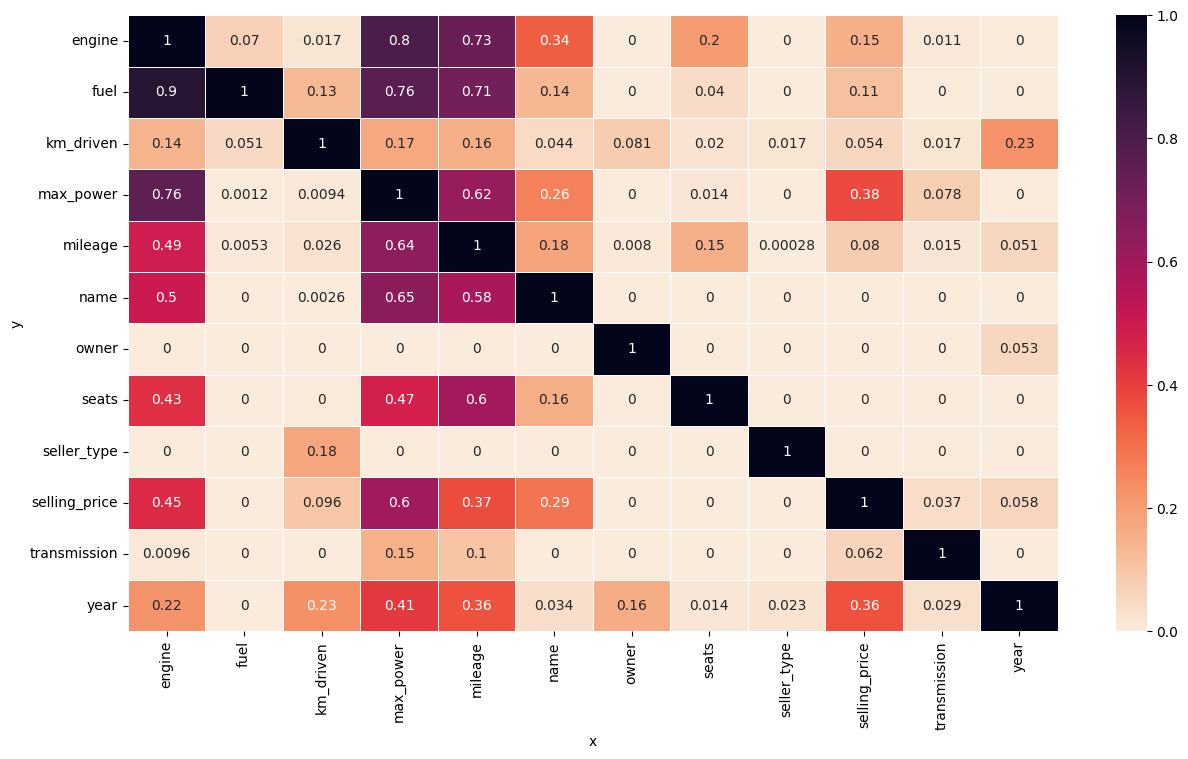

In [30]:
import ppscore as pps

# Copying the data frame to avoid manipulating the original data frame
dfcopy = df.copy()

# Preprocessing using pivot
matrix_df = pps.matrix(dfcopy)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')

# Plot
plt.figure(figsize = (15,8))
sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="rocket_r", linewidths=0.5, annot=True)

### 3. Feature Engineering
The step of feature engineering is skipped considering most of the columns do not require to be merged or to produce derivations.

### 4. Feature Selection

The features selected are "name", "engine" and "mileage". The reason being most people would care what brand their cars are, how much power the engine can produce and how good the fuel economy is. Engine power is chosen over max power (aka break horse power) since most people only know about the engine power (horse power).

In [31]:
x = df[["name", "engine", "mileage"]]
#y = df["selling_price"]
y = np.log(df["selling_price"])

**Train Test Split**

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 24)

### 5. Preprocessing

In [33]:
# Check for null values
X_train[['name', 'engine', 'mileage']].isna().sum()

name         0
engine     173
mileage    173
dtype: int64

In [34]:
X_test[['name', 'engine', 'mileage']].isna().sum()

name        0
engine     41
mileage    41
dtype: int64

In [35]:
y_train.isna().sum()

0

In [36]:
y_test.isna().sum()

0

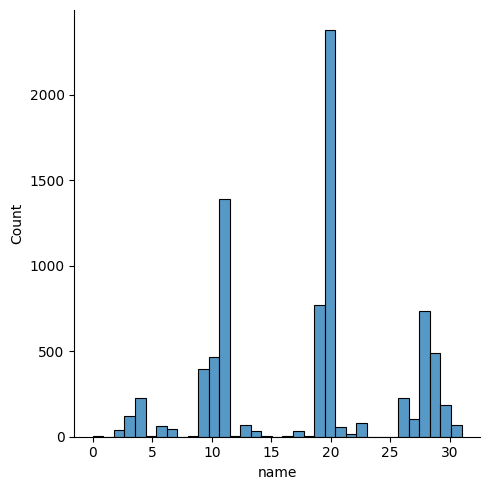

In [37]:
sns.displot(data=df, x='name')

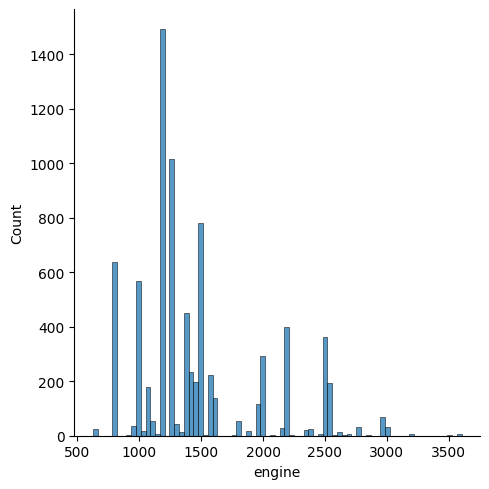

In [38]:
sns.displot(data=df, x='engine')

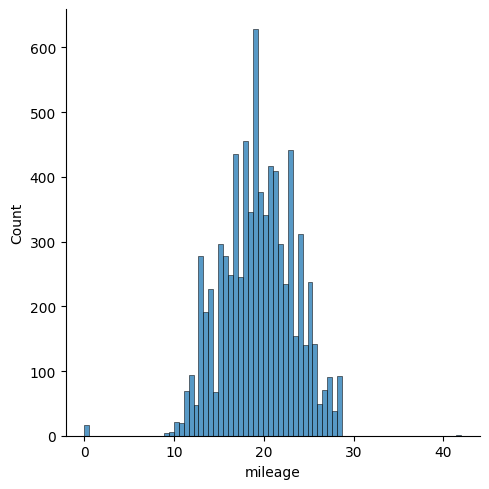

In [39]:
sns.displot(data=df, x='mileage')

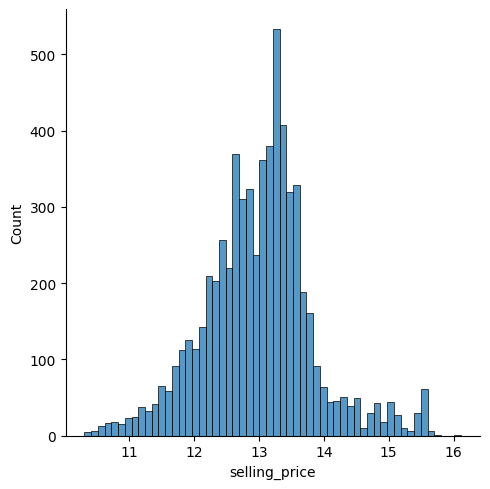

In [40]:
sns.displot(y_train)

In [41]:
# Saving values to put into model file
engine_default = X_train['engine'].median()
mileage_default = X_train['mileage'].mean()

In [42]:
# Training set
# Dropping the name column
X_train['name'].dropna()

# Filling the other columns
X_train['engine'].fillna(X_train['engine'].median(), inplace=True)
X_train['mileage'].fillna(X_train['mileage'].mean(), inplace=True)

In [43]:
# Testing set
X_test['name'].dropna()
X_test['engine'].fillna(X_train['engine'].median(), inplace=True)
X_test['mileage'].fillna(X_train['mileage'].mean(), inplace=True)

In [44]:
# Doing the same for labels
y_train.fillna(y_train.median(), inplace=True)
y_test.fillna(y_test.median(), inplace=True)

In [45]:
# Checking values
X_train[['name', 'engine', 'mileage']].isna().sum()

name       0
engine     0
mileage    0
dtype: int64

In [46]:
X_test[['name', 'engine', 'mileage']].isna().sum()

name       0
engine     0
mileage    0
dtype: int64

In [47]:
y_train.isna().sum()

0

In [48]:
y_test.isna().sum()

0

**Checking outliers**

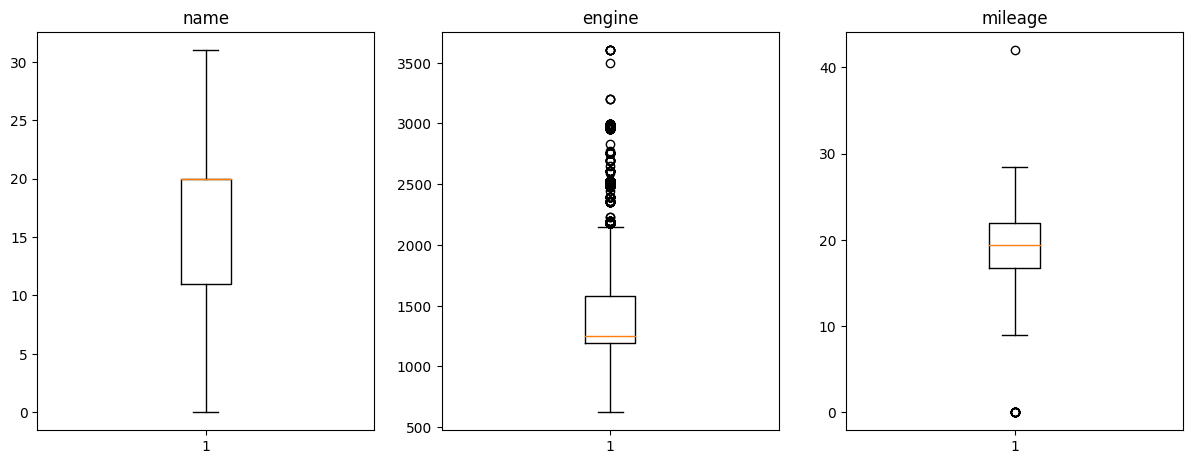

In [49]:
# Create a dictionary of columns.
col_dict = {'name':1,'engine':2,'mileage':3}

# Detect outliers in each variable using box plots.
plt.figure(figsize=(20,30))

for variable,i in col_dict.items():
                     plt.subplot(5,4,i)
                     plt.boxplot(X_train[variable])
                     plt.title(variable)

plt.show()

In [50]:
def outlier_count(col, data = X_train):
    
    # Calculate your 25% quatile and 75% quatile
    q75, q25 = np.percentile(data[col], [75, 25])
    
    # Calculate your inter quatile
    iqr = q75 - q25
    
    # min_val and max_val
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    
    # Count number of outliers, which are the data that are less than min_val or more than max_val calculated above
    outlier_count = len(np.where((data[col] > max_val) | (data[col] < min_val))[0])
    
    # Calculate the percentage of the outliers
    outlier_percent = round(outlier_count/len(data[col])*100, 2)
    
    if(outlier_count > 0):
        print("\n"+15*'-' + col + 15*'-'+"\n")
        print('Number of outliers: {}'.format(outlier_count))
        print('Percent of data that is outlier: {}%'.format(outlier_percent))

In [51]:
for col in X_train.columns:
    outlier_count(col)


---------------engine---------------

Number of outliers: 982
Percent of data that is outlier: 15.29%

---------------mileage---------------

Number of outliers: 15
Percent of data that is outlier: 0.23%


**Scaling**

In [52]:
from sklearn.preprocessing import StandardScaler

# Feature scaling helps improve reach convergence faster
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

In [53]:
# Because we need to access the using the index values for linear regression
y_train = y_train.values

In [54]:
# Adding intercepts to include a bias in our theta
intercept = np.ones((X_train.shape[0], 1))
X_train   = np.concatenate((intercept, X_train), axis=1)
intercept = np.ones((X_test.shape[0], 1))
X_test    = np.concatenate((intercept, X_test), axis=1)

In [55]:
# Shapes of all X_train, X_test, y_train, y_test
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (6422, 4)
Shape of X_test:  (1606, 4)
Shape of y_train:  (6422,)
Shape of y_test:  (1606,)


### 6. Modeling

In [56]:
#experiment tracking
import mlflow
import os
import mlflow.sklearn
mlflow.set_tracking_uri("http://localhost:5000")
os.environ["LOGNAME"] = "vaxer"
mlflow.set_experiment(experiment_name="vaxer-car-price-prediction")

2023/09/14 14:34:55 INFO mlflow.tracking.fluent: Experiment with name 'vaxer-car-price-prediction' does not exist. Creating a new experiment.


<Experiment: artifact_location='mlflow-artifacts:/788336173302233187', creation_time=1694676895717, experiment_id='788336173302233187', last_update_time=1694676895717, lifecycle_stage='active', name='vaxer-car-price-prediction', tags={}>

In [57]:
from sklearn.model_selection import KFold

class LinearRegression(object):
    
    #in this class, we add cross validation as well for some spicy code....
    kfold = KFold(n_splits=3)
            
    def __init__(self, regularization, lr, method, theta_init, momentum, num_epochs=500, batch_size=50, cv=kfold):
        self.lr         = lr
        self.num_epochs = num_epochs
        self.batch_size = batch_size
        self.method     = method
        self.theta_init = theta_init
        self.momentum = momentum
        self.cv         = cv
        self.regularization = regularization

    def mse(self, ytrue, ypred):
        return ((ytrue - ypred) ** 2).sum() / ypred.shape[0]
    
    def r2(self, ytrue, ypred):
        return 1 - ((((ytrue - ypred) ** 2).sum()) / (((ytrue - ytrue.mean()) ** 2).sum()))
    
    def fit(self, X_train, y_train):
            
        #create a list of kfold scores
        self.kfold_scores = list()
        
        #reset val loss
        self.val_loss_old = np.infty

        #kfold.split in the sklearn.....
        #3 splits
        for fold, (train_idx, val_idx) in enumerate(self.cv.split(X_train)):
            
            X_cross_train = X_train[train_idx]
            y_cross_train = y_train[train_idx]
            X_cross_val   = X_train[val_idx]
            y_cross_val   = y_train[val_idx]
            
            if self.theta_init == 'zeros':
                self.theta = np.zeros(X_cross_train.shape[1])
            elif self.theta_init == 'xavier':
                m = X_train.shape[0]
                # calculate the range for the weights
                lower , upper = -(1.0 / math.sqrt(m)), (1.0 / math.sqrt(m))
                # randomly pick weights within this range
                # generate random numbers
                numbers = np.random.rand(X_cross_train.shape[1])
                self.theta = lower + numbers * (upper - lower)
                
            #define X_cross_train as only a subset of the data
            #how big is this subset?  => mini-batch size ==> 50
            #one epoch will exhaust the WHOLE training set
            with mlflow.start_run(run_name=f"Fold-{fold}", nested=True):
                
                params = {"method": self.method, "lr": self.lr, "reg": type(self).__name__}
                mlflow.log_params(params=params)
                
                for epoch in range(self.num_epochs):
                
                    #with replacement or no replacement
                    #with replacement means just randomize
                    #with no replacement means 0:50, 51:100, 101:150, ......300:323
                    #shuffle your index
                    perm = np.random.permutation(X_cross_train.shape[0])
                            
                    X_cross_train = X_cross_train[perm]
                    y_cross_train = y_cross_train[perm]
                    
                    if self.method == 'sto':
                        for batch_idx in range(X_cross_train.shape[0]):
                            X_method_train = X_cross_train[batch_idx].reshape(1, -1) #(11,) ==> (1, 11) ==> (m, n)
                            y_method_train = y_cross_train[batch_idx] 
                            train_loss = self._train(X_method_train, y_method_train)
                    elif self.method == 'mini':
                        for batch_idx in range(0, X_cross_train.shape[0], self.batch_size):
                            #batch_idx = 0, 50, 100, 150
                            X_method_train = X_cross_train[batch_idx:batch_idx+self.batch_size, :]
                            y_method_train = y_cross_train[batch_idx:batch_idx+self.batch_size]
                            train_loss = self._train(X_method_train, y_method_train)
                    else:
                        X_method_train = X_cross_train
                        y_method_train = y_cross_train
                        train_loss = self._train(X_method_train, y_method_train)

                    mlflow.log_metric(key="train_loss", value=train_loss, step=epoch)

                    yhat_val = self.predict(X_cross_val)
                    val_loss_new = self.mse(y_cross_val, yhat_val)
                    mlflow.log_metric(key="val_loss", value=val_loss_new, step=epoch)
                    
                    #record dataset
                    # mlflow_train_data = mlflow.data.from_numpy(features=X_method_train, targets=y_method_train)
                    # mlflow.log_input(mlflow_train_data, context="training")
                    
                    # mlflow_val_data = mlflow.data.from_numpy(features=X_cross_val, targets=y_cross_val)
                    # mlflow.log_input(mlflow_val_data, context="validation")
                    
                    #early stopping
                    if np.allclose(val_loss_new, self.val_loss_old):
                        break
                    self.val_loss_old = val_loss_new
            
                self.kfold_scores.append(val_loss_new)
                print(f"Fold {fold}: {val_loss_new}")
            
                    
    def _train(self, X, y):
        yhat = self.predict(X)
        m    = X.shape[0]        
        grad = (1/m) * X.T @(yhat - y) + self.regularization.derivation(self.theta) # gradient
        prev_step = 0 # memory of previous result
        
        if self.momentum == "without":
            step = self.lr * grad # no momentum = normal equation
        else:
            step = self.lr * grad + self.momentum * prev_step # adding momentum

        # updating theta and previous step
        self.theta -= step
        prev_step = step
        return self.mse(y, yhat)
    
    def predict(self, X):
        return X @ self.theta  #===>(m, n) @ (n, )
    
    def _coef(self):
        return self.theta[1:]  #remind that theta is (w0, w1, w2, w3, w4.....wn)
                               #w0 is the bias or the intercept
                               #w1....wn are the weights / coefficients / theta
    def _bias(self):
        return self.theta[0]
    
    def feature_importance(self):
        # Feature names and importance values
        feature_names = ["name", "engine", "mileage"]
        importance_values = [abs(self._coef()[0]), abs(self._coef()[1]), abs(self._coef()[2])]

        # Create a bar chart for feature importance
        plt.figure(figsize=(8, 6))
        plt.barh(feature_names, importance_values, color='blue')
        plt.xlabel('Feature Importance')
        plt.title('Feature Importance Graph')
        plt.xlim([0,max(self._coef())*1.3])  # Set the x-axis limits
        plt.grid(axis='x', linestyle='--', alpha=0.6)

        plt.show()

In [58]:
class NormalPenalty:
    
    def __init__(self, l):
        self.l = l # lambda value
        
    def __call__(self, theta): #__call__ allows us to call class as method
        return 0 # returning zero because normal just means using linear regression with no regularization
        
    def derivation(self, theta):
        return 0 # returning zero because normal just means using linear regression with no regularization

class LassoPenalty:
    
    def __init__(self, l):
        self.l = l # lambda value
        
    def __call__(self, theta): #__call__ allows us to call class as method
        return self.l * np.sum(np.abs(theta))
        
    def derivation(self, theta):
        return self.l * np.sign(theta)
    
class RidgePenalty:
    
    def __init__(self, l):
        self.l = l
        
    def __call__(self, theta): #__call__ allows us to call class as method
        return self.l * np.sum(np.square(theta))
        
    def derivation(self, theta):
        return self.l * 2 * theta
    
class ElasticPenalty:
    
    def __init__(self, l = 0.1, l_ratio = 0.5):
        self.l = l 
        self.l_ratio = l_ratio

    def __call__(self, theta):  #__call__ allows us to call class as method
        l1_contribution = self.l_ratio * self.l * np.sum(np.abs(theta))
        l2_contribution = (1 - self.l_ratio) * self.l * 0.5 * np.sum(np.square(theta))
        return (l1_contribution + l2_contribution)

    def derivation(self, theta):
        l1_derivation = self.l * self.l_ratio * np.sign(theta)
        l2_derivation = self.l * (1 - self.l_ratio) * theta
        return (l1_derivation + l2_derivation)
    
class Normal(LinearRegression):
    
    def __init__(self, method, lr, theta_init, momentum, l):
        self.regularization = NormalPenalty(l)
        super().__init__(self.regularization, lr, method, theta_init, momentum)

class Lasso(LinearRegression):
    
    def __init__(self, method, lr, theta_init, momentum, l):
        self.regularization = LassoPenalty(l)
        super().__init__(self.regularization, lr, method, theta_init, momentum)
        
class Ridge(LinearRegression):
    
    def __init__(self, method, lr, theta_init, momentum, l):
        self.regularization = RidgePenalty(l)
        super().__init__(self.regularization, lr, method, theta_init, momentum)
        
class ElasticNet(LinearRegression):
    
    def __init__(self, method, lr,theta_init, momentum, l, l_ratio=0.5):
        self.regularization = ElasticPenalty(l, l_ratio)
        super().__init__(self.regularization, lr, method, theta_init, momentum)


In [59]:
#helper function for looping classnames
import sys

def str_to_class(classname):
    return getattr(sys.modules[__name__], classname)

In [60]:
#iterating through all possible parameters
polynomials = ["no",1] #to use polynomial feature engineering or not
regs = ["Ridge", "Lasso", "ElasticNet","Normal"] #type of regularization
methods = ["batch","mini","sto"]
lrs = [0.01,0.001,0.0001]
thetas = ["zeros","xavier"]
momentums = ["without",0.4] #momentum should be in range of (0,1)


for polynomial in polynomials:
    for reg in regs:
        for method in methods:
            for lr in lrs:
                for theta in thetas:
                    for momentum in momentums:
                        params = {"method": method, "lr": lr, "theta_init": theta, "momentum": momentum, "l": 0.1}
                        mlflow.start_run(run_name=f"polynomial-{polynomial}-method-{params['method']}-lr-{params['lr']}-reg-{reg}-theta_init-{params['theta_init']}-momentum-{params['momentum']}", nested=True)
                        mlflow.log_params(params=params)

                        print("="*5, polynomial, "="*5)
                        print("="*5, reg, "="*5)                        
                        print("="*5, method, "="*5)                        
                        print("="*5, lr, "="*5)                        
                        print("="*5, momentum, "="*5)
                        

                        if polynomial == "no":
                            X_train_poly, X_test_poly = X_train, X_test # No transformation for other regressions
                        else:
                           # Apply polynomial feature transformation
                            poly = PolynomialFeatures(degree=polynomial, include_bias=False)
                            X_train_poly = poly.fit_transform(X_train)
                            X_test_poly = poly.transform(X_test)   
                            
                        # #######
                        type_of_regression = str_to_class(reg)    #Ridge, Lasso, ElasticNet, Normal
                        model = type_of_regression(**params)  
                        model.fit(X_train_poly, y_train)
                        yhat = model.predict(X_train_poly)
                        train_mse  = model.mse(y_train, yhat)
                        train_r2 = model.r2(y_train, yhat)

                        yhat = model.predict(X_test_poly)
                        test_mse  = model.mse(y_test, yhat)
                        test_r2 = model.r2(y_test, yhat)

                        print("Train MSE: ", train_mse)
                        mlflow.log_metric(key="train_mse", value=train_mse)

                        print("Train R2: ", train_r2)
                        mlflow.log_metric(key="train_r2", value=train_r2)

                        print("Test MSE: ", test_mse)
                        mlflow.log_metric(key="test_mse", value=test_mse)

                        print("Test R2: ", test_r2)
                        mlflow.log_metric(key="test_r2", value=test_r2)

                        signature = mlflow.models.infer_signature(X_train_poly, model.predict(X_train_poly))
                        mlflow.sklearn.log_model(model, artifact_path='model', signature=signature)

                        # #######

                        mlflow.end_run()

===== no =====
===== Ridge =====
===== batch =====
===== 0.01 =====
===== without =====
Fold 0: 5.269510193251772
Fold 1: 5.279491238984378
Fold 2: 5.275921221250074
Train MSE:  5.265581748634503
Train R2:  -6.400231600123385
Test MSE:  5.162277992786523
Test R2:  -6.791886204599815
===== no =====
===== Ridge =====
===== batch =====
===== 0.01 =====
===== 0.4 =====
Fold 0: 5.269510193251772
Fold 1: 5.279491238984378
Fold 2: 5.275921221250074
Train MSE:  5.265581748634503
Train R2:  -6.400231600123385
Test MSE:  5.162277992786523
Test R2:  -6.791886204599815
===== no =====
===== Ridge =====
===== batch =====
===== 0.01 =====
===== without =====
Fold 0: 5.269470467154616
Fold 1: 5.279486766647928
Fold 2: 5.275920485395024
Train MSE:  5.265535172653002
Train R2:  -6.400166142389261
Test MSE:  5.162324717923936
Test R2:  -6.791956731013567
===== no =====
===== Ridge =====
===== batch =====
===== 0.01 =====
===== 0.4 =====
Fold 0: 5.269280878010059
Fold 1: 5.279692564456594
Fold 2: 5.275903

**Selecting best model**

By comparing the training mse and r2 score from mlflow, we can see that the best parameters for our model is with no polynomial features, using the Normal regularization, with stochastic method, with a learning rate of 0.0001, theta is initialized using zeroes, with 0.4 momentum and a loss of 0.1.

In [61]:
model = Normal("sto",0.0001,"zeros",0.4,0.1)
model.fit(X_train, y_train)
yhat = model.predict(X_train)
mse  = model.mse(y_train, yhat)
r2 = model.r2(y_train, yhat)

Fold 0: 0.4385779175258345
Fold 1: 0.44722787371199163
Fold 2: 0.4444000605651254


In [62]:
print(mse) #mse of our model
print(r2) #r2 of our model

0.44282309510073736
0.37765785091481563


In [63]:
# Save the model,scaler and values together
model_zip = {
    'model': model,
    'scaler': scaler,
    'engine_default' : engine_default,
    'mileage_default' : mileage_default,
    'name_map' : name_map
}

### 7. Testing

In [64]:
# Testing our model using the testing set and showing the mse and r2
yhat = model.predict(X_test)
mse  = model.mse(y_test, yhat)
r2 = model.r2(y_test, yhat)
print("MSE :", mse)
print("R2 :", r2)

MSE : 0.41040306625668665
R2 : 0.3805420795316744


### 8. Feature Importance

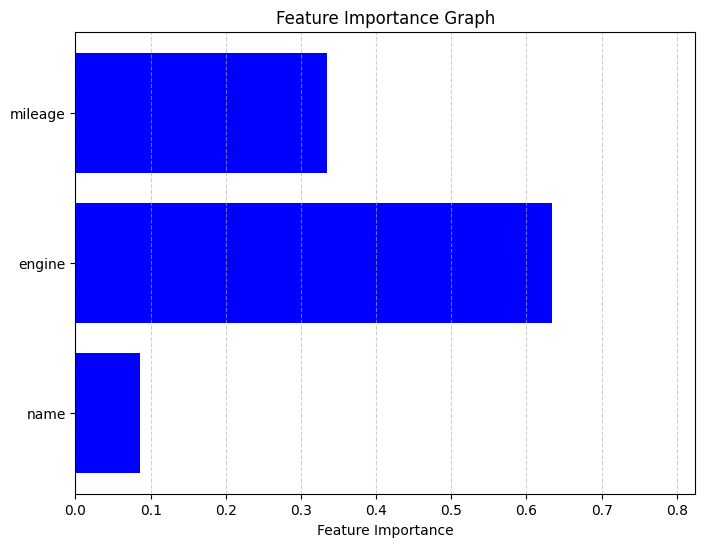

In [65]:
# Feature importance graph by calling the custom method from the LinearRegression class
model.feature_importance()

### 9. Inference

In [66]:
import pickle

# Save the model to disk
filename = './app/code/model/car_price_new.model'
pickle.dump(model_zip, open(filename, 'wb'))

In [67]:
# Load the model from disk
loaded_data = pickle.load(open(filename, 'rb'))

In [68]:
# Loading the model and scaler to test
loaded_model = loaded_data['model']
loaded_scaler = loaded_data['scaler']

In [69]:
# Test the model with a sample input
df[['name', 'engine', 'mileage', 'selling_price']].loc[7898]

name                 20.00
engine             1248.00
mileage              24.52
selling_price    795000.00
Name: 7898, dtype: float64

In [70]:
#['name', 'engine', 'mileage'] 
sample = np.array([[20, 1248, 24.52]])

# Scaling the sample data to feed the model
sample_scaled = loaded_scaler.transform(sample)
intercept = np.ones((sample_scaled.shape[0], 1))

# Adding intercepts to match the model's theta shape
sample_scaled  = np.concatenate((intercept, sample_scaled), axis=1)
sample_scaled

array([[ 1.        ,  0.27182549, -0.43479265,  1.30098695]])

In [71]:
# Predicting and taking the exponent to show the predicted car price
predicted_car_price = loaded_model.predict(sample_scaled)
predicted_car_price = np.exp(predicted_car_price)
predicted_car_price

array([500650.12793357])

**Report**

From running through all the possible parameters for our model, we found that the best regularization method just using Linear Regression normally. I believe this was because our features were not prone to over fit and not regularizing them gave the best results. The method chosen was stocastic but the other two methods also gave similar results. We had a learning rate of 0.001 and no momentum. The $\theta$ was initialized using zeros. The following screenshot shows the best runs by sorting them in ascending mse order.

![Top model](image-2.png)

These are the models that performed the worst, and we can observe that using batch method gives us bad models.

![Worst model](image-3.png)

This is screenshot from MLflow showing the parallel coordinates chart.

![Parallel chart](image-4.png)

The following table shows the range of the mse of the models. 

|       |  Normal  |  Ridge   |   Lasso  | Elastic Net|
|:--------:|:--------:|:--------:|:--------:|:----------:|
| Batch |  150-60   |  150-60   |  150-60   |  150-60  |
| Mini  |  5-0.4   |  5-0.4   |  5-0.4   |  5-0.4     |
| Sto   |  5-0.4   |  5-0.4   |  5-0.4   |  5-0.4     |

From here, we can see that the batch method gives us a very bad model, where either minibatch or stocastic are competative, depending on the learning rate, theta initialization and momentum.